In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df_poke = pd.read_excel('pokemon_data_tratado.xlsx')
df_poke

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,0,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
1,1,8,Wartortle,Water,Water,405,59,63,80,65,80,58,0
2,2,11,Metapod,Bug,Bug,205,50,20,55,25,25,30,0
3,3,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,0
4,4,19,Rattata,Normal,Normal,253,30,56,35,25,35,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,543,554,Darumaka Galarian Darumaka,Ice,Ice,315,70,90,45,15,45,50,0
544,544,555,Darmanitan Galarian Zen Mode,Ice,Fire,540,105,160,55,30,55,135,0
545,545,571,Zoroark Hisuian Zoroark,Normal,Ghost,510,55,100,60,125,60,110,0
546,546,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32,0


In [79]:
x = df_poke.drop(labels='Is_legendary', axis=1)
y = df_poke['Is_legendary'].values

In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column_name in x:
    column_dtype = x[column_name].dtype
    if column_dtype == 'object':
        x[column_name] = label_encoder.fit_transform(x[column_name])

df_testinho = pd.DataFrame(x)
display(df_testinho)

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,2,218,9,13,405,60,62,63,80,80,60
1,1,8,515,17,17,405,59,63,80,65,80,58
2,2,11,288,0,0,205,50,20,55,25,25,30
3,3,16,345,12,7,251,40,45,40,35,35,56
4,4,19,370,12,12,253,30,56,35,25,35,72
...,...,...,...,...,...,...,...,...,...,...,...,...
543,543,554,94,11,11,315,70,90,45,15,45,50
544,544,555,91,11,6,540,105,160,55,30,55,135
545,545,571,545,12,8,510,55,100,60,125,60,110
546,546,618,451,10,16,471,109,81,99,66,84,32


In [81]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessador = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['float']))])

x_pre = preprocessador.fit_transform(x)
display(x_pre)

array([[  0,   2, 218, ...,  80,  80,  60],
       [  1,   8, 515, ...,  65,  80,  58],
       [  2,  11, 288, ...,  25,  25,  30],
       ...,
       [545, 571, 545, ..., 125,  60, 110],
       [546, 618, 451, ...,  66,  84,  32],
       [547, 724,  95, ...,  95,  95,  60]], dtype=int64)

In [82]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_pre,y,random_state=0, test_size=0.3)

In [83]:
from sklearn import tree

classificador_gini = tree.DecisionTreeClassifier(criterion='gini')

classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

[Text(0.625, 0.9375, 'Total <= 560.0\ngini = 0.264\nsamples = 383\nvalue = [323, 60]\nclass = 0'),
 Text(0.3611111111111111, 0.8125, 'Total <= 537.5\ngini = 0.025\nsamples = 322\nvalue = [318, 4]\nclass = 0'),
 Text(0.2222222222222222, 0.6875, 'Total <= 202.5\ngini = 0.019\nsamples = 318\nvalue = [315, 3]\nclass = 0'),
 Text(0.1111111111111111, 0.5625, 'Name <= 108.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(0.05555555555555555, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.16666666666666666, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.5625, 'HP <= 79.0\ngini = 0.013\nsamples = 313\nvalue = [311, 2]\nclass = 0'),
 Text(0.2777777777777778, 0.4375, 'gini = 0.0\nsamples = 238\nvalue = [238, 0]\nclass = 0'),
 Text(0.3888888888888889, 0.4375, 'Type_2 <= 16.5\ngini = 0.052\nsamples = 75\nvalue = [73, 2]\nclass = 0'),
 Text(0.2777777777777778, 0.3125, 'Name <= 52.0\ngini = 0.028\nsamples = 71\nvalue = 

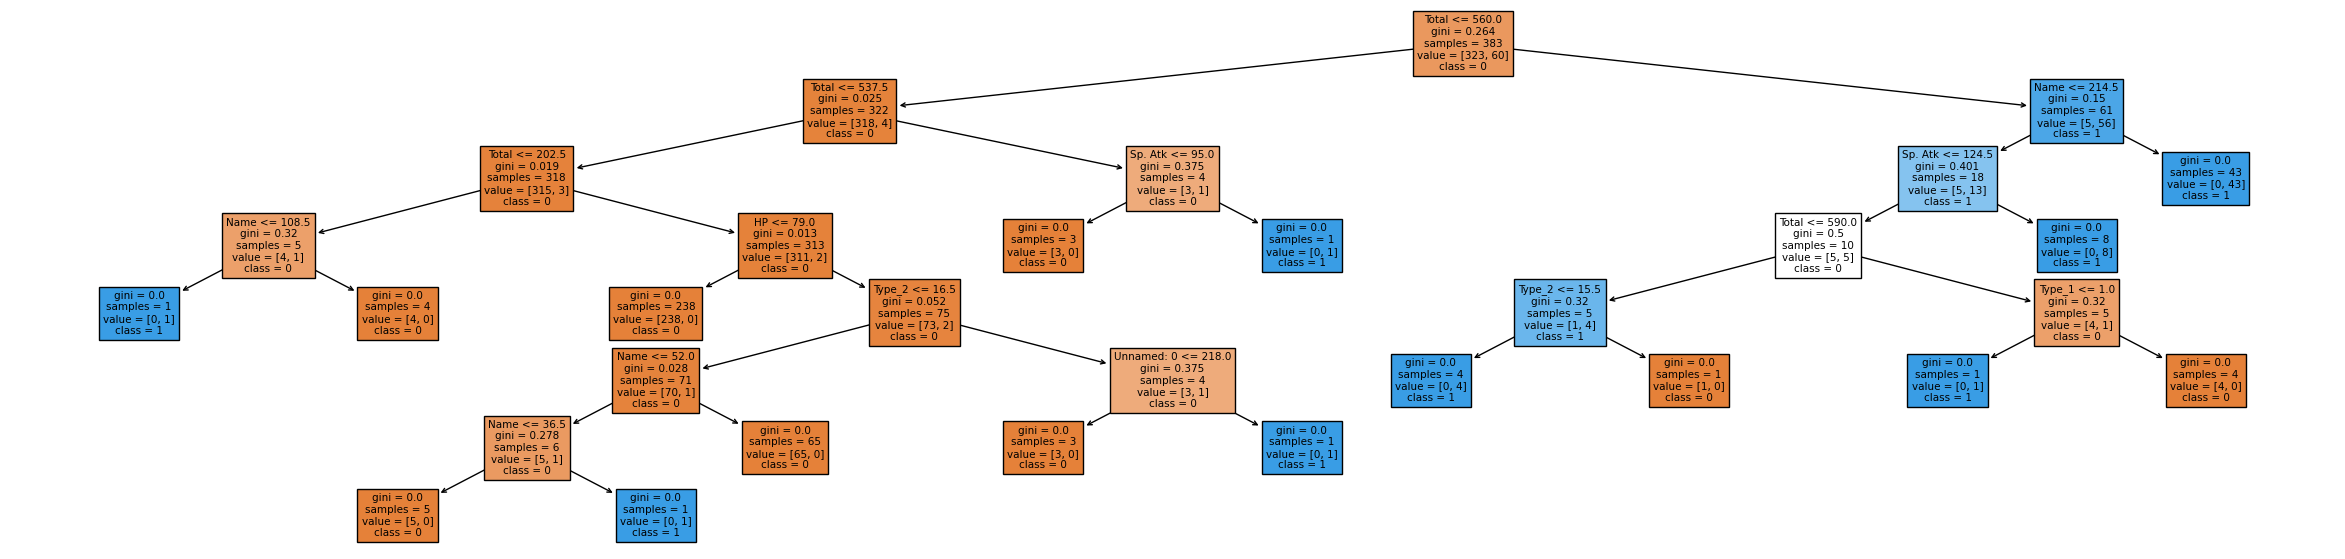

In [84]:
plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_gini,
    feature_names=x.columns.astype(str),
    class_names=classificador_gini.classes_.astype(str),
    filled=True
)

In [85]:
from sklearn.metrics import accuracy_score

resp_treino_gini = classificador_gini.predict(x_treino)

print('Gini:', accuracy_score(y_treino, resp_treino_gini))

Gini: 1.0


<AxesSubplot: >

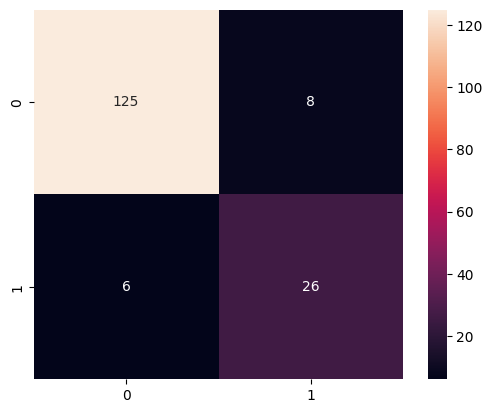

In [86]:
y_pred = classificador_gini.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_gini.classes_, xticklabels = classificador_gini.classes_,fmt = 'd')

In [87]:
path = classificador_gini.cost_complexity_pruning_path(x_treino, y_treino)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.00207543 0.00256278 0.00417755 0.00417755 0.00469974
 0.00545735 0.21963471]
[0.         0.01037713 0.02062825 0.0248058  0.02898334 0.03368308
 0.04459778 0.26423249]


In [88]:
ccp_alphas = ccp_alphas[:-1]

classificadores_prune = []

for ccp_alpha in ccp_alphas:
    classificador_prune = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    classificador_prune.fit(x_treino, y_treino)
    classificadores_prune.append(classificador_prune)
    
    acuracia_treino = [
    classificador_prune.score(x_treino, y_treino) for classificador_prune in classificadores_prune
    ]

    acuracia_teste = [
        classificador_prune.score(x_teste, y_teste) for classificador_prune in classificadores_prune
    ]

In [89]:
classificadores_prune[acuracia_teste.index(max(acuracia_teste))]

DecisionTreeClassifier(ccp_alpha=0.005457347087274753)

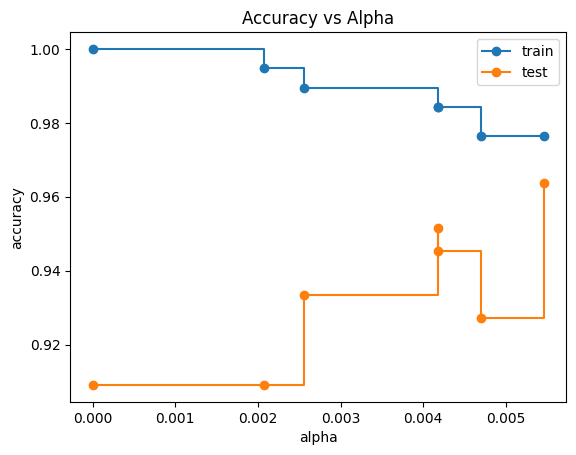

In [90]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp_alphas, acuracia_treino, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, acuracia_teste, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [91]:
index_max = acuracia_teste.index(max(acuracia_teste))

print(f"Acurácia CCP Treino: {acuracia_treino[index_max]}")
print(f"Acurácia CCP Teste: {max(acuracia_teste)}")

Acurácia CCP Treino: 0.9765013054830287
Acurácia CCP Teste: 0.9636363636363636


[Text(0.5, 0.75, 'Total <= 560.0\ngini = 0.264\nsamples = 383\nvalue = [323, 60]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.025\nsamples = 322\nvalue = [318, 4]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.15\nsamples = 61\nvalue = [5, 56]\nclass = 1')]

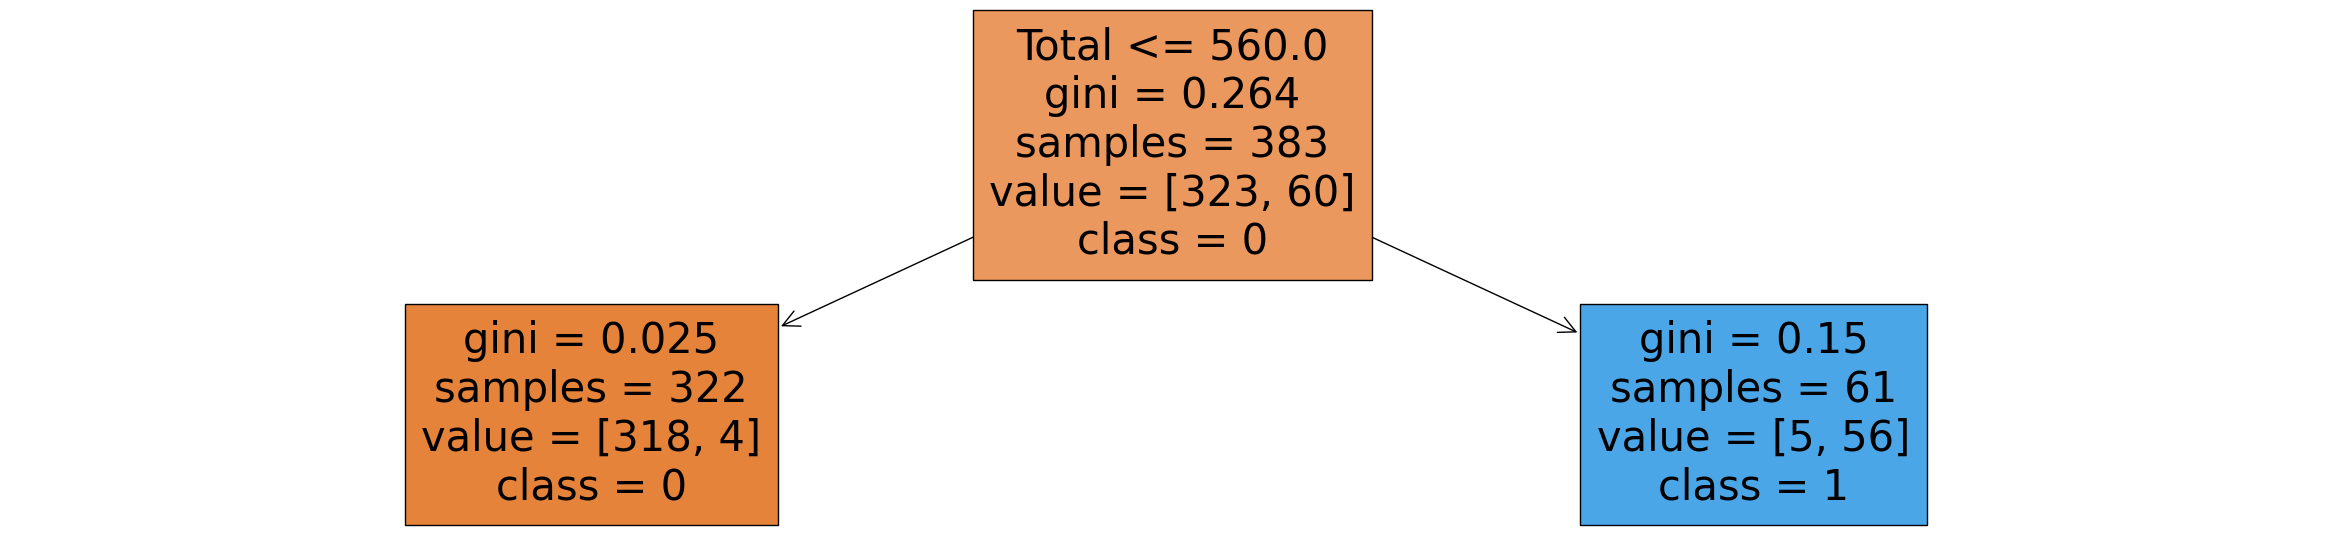

In [92]:
alpha = ccp_alphas[index_max]

classificador_ccp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
classificador_ccp.fit(x_treino, y_treino)

y_pred = classificador_ccp.predict(x_teste)

plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_ccp,
    feature_names=x.columns.astype(str),
    class_names=classificador_ccp.classes_.astype(str),
    filled=True
)

<AxesSubplot: >

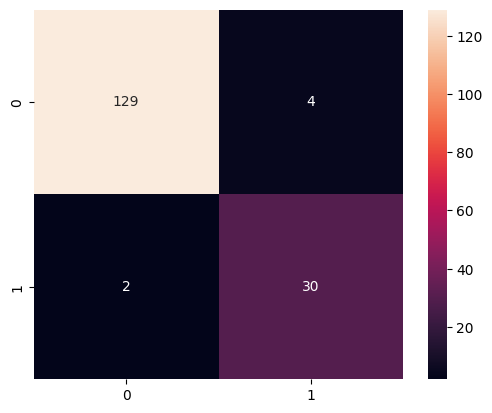

In [93]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_ccp.classes_, xticklabels = classificador_ccp.classes_,fmt = 'd')